In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv('Trans_Raw_Housing_Prices')

In [3]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
data.head()

,Sale_Price,No_of_Bedrooms,No_of_Bathrooms,Lot_Area(in Sqft),No_of_Floors,No_of_Times_Visited,Overall_Grade,Area_of_the_House_from_Basement(in Sqft),Basement_Area(in Sqft),Age_of_House(in Years),...,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9,Trans_Flate_Area,Luxury_Home_Yes
0,221900.0,3,1.00,5650.0,1.0,0,7,1180.0,0,63,...,0,0,0,0,0,0,0,0,7.073270,0
1,538000.0,3,2.25,7242.0,2.0,0,7,2170.0,400,67,...,1,0,0,0,0,0,0,0,7.851661,0
2,180000.0,2,1.00,10000.0,1.0,0,6,770.0,0,85,...,1,0,0,0,0,0,0,0,6.646391,0
3,604000.0,4,3.00,5000.0,1.0,0,7,1050.0,910,53,...,0,1,0,0,0,0,0,0,7.580700,0
4,510000.0,3,2.00,8080.0,1.0,0,8,1680.0,0,31,...,0,0,1,0,0,0,0,0,7.426549,0


## Splitting Independent and Dependent variable and scalling it

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Sale_Price']
X = scaler.fit_transform(data.drop(columns = ['Sale_Price']))
X = pd.DataFrame(data = X, columns = data.drop(columns = ['Sale_Price']).columns)

## Checking and Removing Multicollinearity

In [6]:
X.corr() # To view the straength of linear relationship between independent variables

,No_of_Bedrooms,No_of_Bathrooms,Lot_Area(in Sqft),No_of_Floors,No_of_Times_Visited,Overall_Grade,Area_of_the_House_from_Basement(in Sqft),Basement_Area(in Sqft),Age_of_House(in Years),Latitude,...,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9,Trans_Flate_Area,Luxury_Home_Yes
No_of_Bedrooms,1.000000,0.515813,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,-0.008708,...,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694,0.620788,0.303925
No_of_Bathrooms,0.515813,1.000000,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,0.024570,...,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871,0.761225,0.578197
Lot_Area(in Sqft),0.031692,0.087732,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,-0.085719,...,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671,0.148739,0.100411
No_of_Floors,0.175536,0.500776,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,0.049692,...,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868,0.367863,0.225882
No_of_Times_Visited,0.079575,0.187791,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,0.006162,...,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923,0.246770,0.198325
Overall_Grade,0.349223,0.635638,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,0.111226,...,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638,0.721705,0.412289
Area_of_the_House_from_Basement(in Sqft),0.477549,0.685088,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,-0.000819,...,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398,0.831972,0.510402
Basement_Area(in Sqft),0.303294,0.283798,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,0.110451,...,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775,0.423228,0.238280
Age_of_House(in Years),-0.154113,-0.505954,-0.053119,-0.489244,0.053395,-0.456711,-0.423848,0.133072,1.000000,0.148083,...,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492,-0.349501,-0.184115
Latitude,-0.008708,0.024570,-0.085719,0.049692,0.006162,0.111226,-0.000819,0.110451,0.148083,1.000000,...,0.120400,0.283760,0.249304,0.190199,0.090785,0.056373,0.036085,0.022867,0.039450,0.058095


### As, there are total 31X31 = 961 entities, it's impossible to check each and everyone manually, for this, this whole process should be automated as follows:


In [7]:
k = X.corr()

z = [[str(i),str(j)] for i in k.columns for j in k.columns if (abs(k.loc[i,j]>0.5) & (i!=j))]
z, len(z)

([['No_of_Bedrooms', 'No_of_Bathrooms'],
  ['No_of_Bedrooms', 'Trans_Flate_Area'],
  ['No_of_Bathrooms', 'No_of_Bedrooms'],
  ['No_of_Bathrooms', 'No_of_Floors'],
  ['No_of_Bathrooms', 'Overall_Grade'],
  ['No_of_Bathrooms', 'Area_of_the_House_from_Basement(in Sqft)'],
  ['No_of_Bathrooms', 'Living_Area_after_Renovation(in Sqft)'],
  ['No_of_Bathrooms', 'Trans_Flate_Area'],
  ['No_of_Bathrooms', 'Luxury_Home_Yes'],
  ['Lot_Area(in Sqft)', 'Lot_Area_after_Renovation(in Sqft)'],
  ['No_of_Floors', 'No_of_Bathrooms'],
  ['No_of_Floors', 'Area_of_the_House_from_Basement(in Sqft)'],
  ['Overall_Grade', 'No_of_Bathrooms'],
  ['Overall_Grade', 'Area_of_the_House_from_Basement(in Sqft)'],
  ['Overall_Grade', 'Living_Area_after_Renovation(in Sqft)'],
  ['Overall_Grade', 'Trans_Flate_Area'],
  ['Area_of_the_House_from_Basement(in Sqft)', 'No_of_Bathrooms'],
  ['Area_of_the_House_from_Basement(in Sqft)', 'No_of_Floors'],
  ['Area_of_the_House_from_Basement(in Sqft)', 'Overall_Grade'],
  ['Area_of

In [8]:
# So, there are total 18(36/2) elements with r-value>0.5
# Hence, signifies there is strong linear relation between the
# listed independent variables. That's a contradiction for 
# the assumption of linear regression
# That's it should be removed. For this, VIF is gonna counted!

## Calculating VIF

In [9]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = X


In [10]:
vif_data.shape

(21609, 31)

In [11]:
## Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])], index=vif_data.columns)
VIF

No_of_Bedrooms                                1.786311
No_of_Bathrooms                               3.914624
Lot_Area(in Sqft)                             2.109095
No_of_Floors                                  2.147087
No_of_Times_Visited                           1.440055
Overall_Grade                                 3.140083
Area_of_the_House_from_Basement(in Sqft)     13.577273
Basement_Area(in Sqft)                        5.075318
Age_of_House(in Years)                        2.653035
Latitude                                      2.472100
Longitude                                     1.682180
Living_Area_after_Renovation(in Sqft)         3.083947
Lot_Area_after_Renovation(in Sqft)            2.144545
Year_since_Renovation                         2.789421
Ever_Renovated_Yes                            2.956273
Waterfront_View_Yes                           1.209523
Condition_of_the_House_Excellent             53.639292
Condition_of_the_House_Fair                 166.250262
Condition_

### As, we can see there're few columns having vif values more than the threshold(5), to filter those columns, as following:

In [12]:
VIF[VIF>5].sort_values(ascending=False)

Condition_of_the_House_Fair                 166.250262
Condition_of_the_House_Good                 141.478636
Condition_of_the_House_Excellent             53.639292
Trans_Flate_Area                             16.468541
Area_of_the_House_from_Basement(in Sqft)     13.577273
Condition_of_the_House_Okay                   6.703619
Basement_Area(in Sqft)                        5.075318
dtype: float64

### Removing one or two such columns may make things normal. As follows:

In [13]:
# definning a function to eliminate such columns
flag = 0
def MC_remover(data,flag):
    vif = pd.Series([variance_inflation_factor(data.values,i) for i in range(data.shape[1])], index=data.columns)
    if vif.max()>5:
        print(f'{vif[vif==vif.max()].index[0]} has been removed !')
        data=data.drop(columns=[vif[vif==vif.max()].index[0]])
        return data,flag
    else:
        print('No Multicollinearity present in the anymore !')
        flag = 1
        return data,flag

In [14]:
for i in range(len(VIF[VIF>5].sort_values(ascending=False))):
    if flag:
        break
    vif_data, flag = MC_remover(vif_data,0)

        
vif_data.head()

Condition_of_the_House_Fair has been removed !
Trans_Flate_Area has been removed !
No Multicollinearity present in the anymore !


,No_of_Bedrooms,No_of_Bathrooms,Lot_Area(in Sqft),No_of_Floors,No_of_Times_Visited,Overall_Grade,Area_of_the_House_from_Basement(in Sqft),Basement_Area(in Sqft),Age_of_House(in Years),Latitude,...,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9,Luxury_Home_Yes
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.282397
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.282397
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.282397
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.282397
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.282397


In [15]:
# Rechecking either the vif value is undercontrol or not

VIF = pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])], index=vif_data.columns)
VIF, len(vif_data.columns)

(No_of_Bedrooms                              1.654602
 No_of_Bathrooms                             3.751879
 Lot_Area(in Sqft)                           2.108073
 No_of_Floors                                2.144652
 No_of_Times_Visited                         1.435600
 Overall_Grade                               2.958518
 Area_of_the_House_from_Basement(in Sqft)    4.858489
 Basement_Area(in Sqft)                      2.000353
 Age_of_House(in Years)                      2.649726
 Latitude                                    2.471452
 Longitude                                   1.674607
 Living_Area_after_Renovation(in Sqft)       3.074448
 Lot_Area_after_Renovation(in Sqft)          2.144173
 Year_since_Renovation                       2.788550
 Ever_Renovated_Yes                          2.955964
 Waterfront_View_Yes                         1.208541
 Condition_of_the_House_Excellent            1.210647
 Condition_of_the_House_Good                 1.255554
 Condition_of_the_House_Okay

In [16]:
sum(VIF[VIF>5])

0

### Hence, multicollinearity is completely removed fro the dataset
## Train/Test Splitting

In [17]:
X = vif_data
y = data['Sale_Price']

In [18]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.3,random_state=101)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((15126, 29), (6483, 29), (15126,), (6483,))

## Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(X_train,y_train)

LinearRegression(normalize=True)

In [20]:
lr.coef_, len(lr.coef_)

(array([ -2872.79648075,   7059.41557116,  14960.38487539,   3782.26460855,
         26713.61157171,  60262.82564138,  76228.49847408,  26445.23702169,
         26699.89467946,  21343.27043282, -23424.58753412,  18897.3298033 ,
         -2965.35530101,  -9947.71101595,  14755.90334713,  10895.37115707,
         14800.43780073,   5575.42743423,  -2406.00313862,  12343.51786926,
         33786.10681553,  63165.65638656,  81058.96755468,  50562.46378267,
         73090.0596396 ,  39889.09317041,  66876.29615363,  21968.53002123,
         10666.78668591]),
 29)

In [21]:
predictions = lr.predict(X_test)

## Calculating the R^2(R square) value of the model

In [22]:
lr.score(X_test,y_test)

0.8465202682623109

# Now it's time for checking other assumptions of linear regressions

## 1.Residuals

In [23]:
predictions

array([ 545601.99875149,  642968.50014089,  606991.20093324, ...,
       1045899.8919485 ,  967847.0931019 , 1225599.52920612])

In [24]:
y_test

19827     610360.0
12528     740000.0
1611      537500.0
8686      520000.0
18204    1129575.0
           ...    
10797     411000.0
13197     835000.0
1761      597326.0
5749     1129575.0
11618    1129575.0
Name: Sale_Price, Length: 6483, dtype: float64

In [25]:
residuals = predictions - y_test
residual_table = pd.DataFrame({'Residuals':residuals,
                               'Predictions':predictions})
residual_table = residual_table.sort_values(by='Predictions')
residual_table.head()

,Residuals,Predictions
1147,-214825.414376,-139825.414376
19450,-198110.221918,-56110.221918
4201,-126181.754535,23818.245465
11586,-152672.895420,35327.104580
13714,-136849.806652,43150.193348


In [26]:
z = [i for i in range(int(residual_table['Predictions'].max()))]
k = [0 for i in range(int(residual_table['Predictions'].max()))]

## Checking for Homoscedasticity

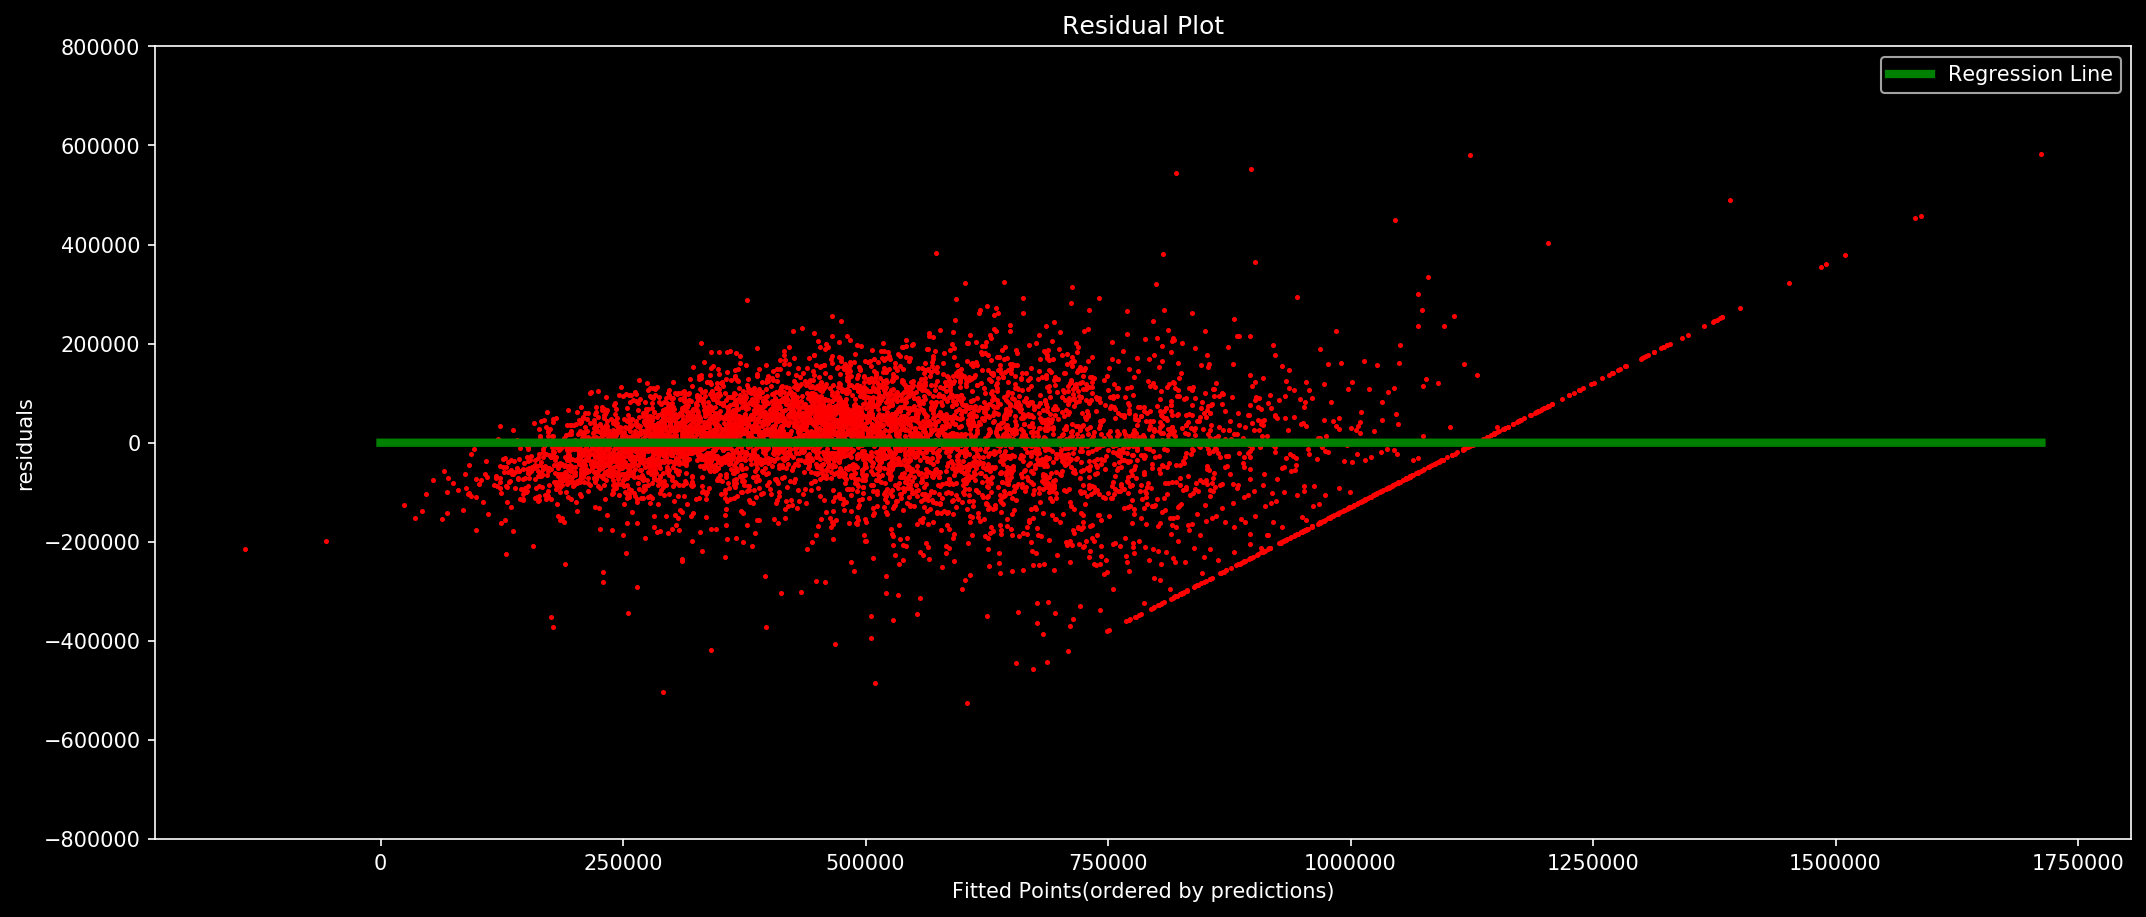

In [27]:
plt.figure(dpi=150, figsize=(17,7))

plt.scatter(residual_table['Predictions'],residual_table['Residuals'],color='red',s=2)
plt.plot(z,k,linewidth=4,label='Regression Line',color='green')
plt.ylim(-800_000,800_000)
plt.xlabel('Fitted Points(ordered by predictions)')
plt.ylabel('residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

## As, the Residual plot isn't of the cone shape, and quite pipe shape in nature, there's no heteroscedasticity

## Distribution of errors

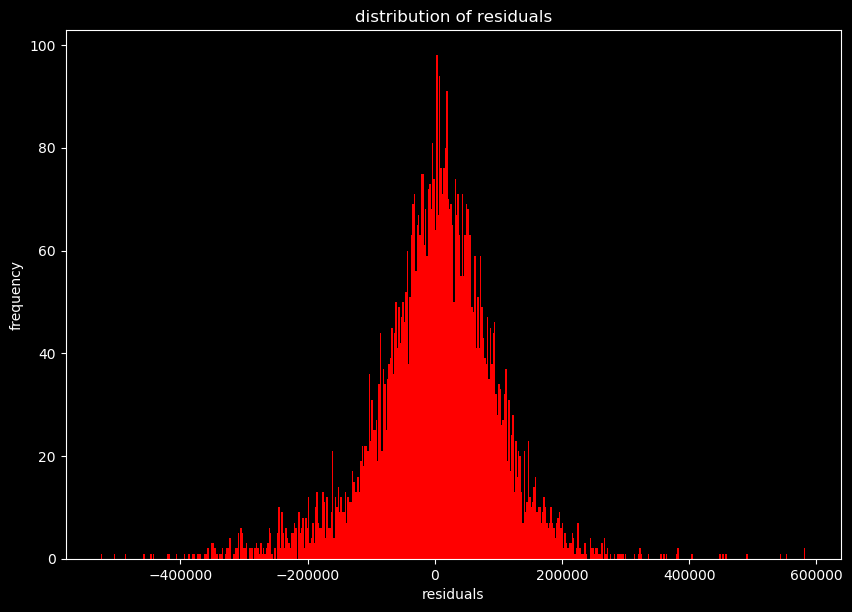

In [28]:
plt.figure(dpi = 100, figsize = (10,7))
plt.hist(residual_table['Residuals'], color = 'red', bins = 500)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

## Model Coefficients

In [29]:
coefficients_table = pd.DataFrame({'column':X_train.columns,
                                   'coefficients':lr.coef_})
coefficients_table.sort_values(by='coefficients', inplace=True)
coefficients_table.head()

,column,coefficients
10,Longitude,-23424.587534
13,Year_since_Renovation,-9947.711016
12,Lot_Area_after_Renovation(in Sqft),-2965.355301
0,No_of_Bedrooms,-2872.796481
18,Condition_of_the_House_Okay,-2406.003139


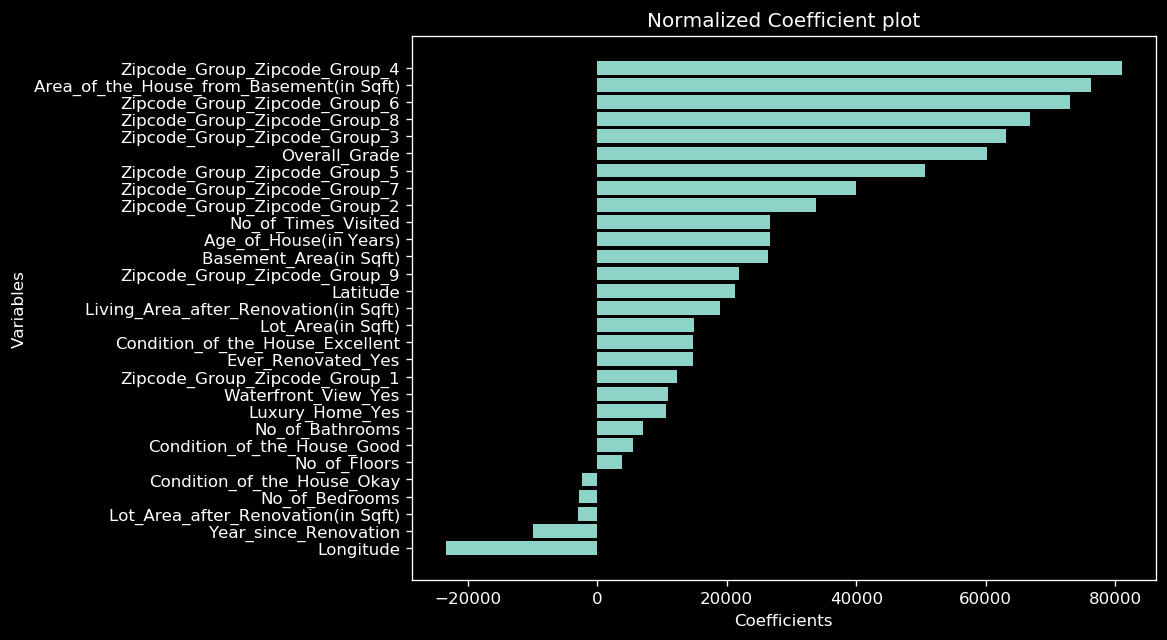

In [30]:
plt.figure(figsize=(8, 6), dpi=120)
x = coefficients_table['column']
y = coefficients_table['coefficients']
plt.barh( x, y)
plt.xlabel( "Coefficients")
plt.ylabel('Variables')
plt.title('Normalized Coefficient plot')
plt.show()

# Interpretations of the significance of the coefficients of various independent variables.

In [31]:
lr.predict([X_test.iloc[0]])

array([545601.99875149])

In [32]:
X_test.iloc[0]

No_of_Bedrooms                              0.676667
No_of_Bathrooms                             0.500326
Lot_Area(in Sqft)                          -0.230416
No_of_Floors                                0.936817
No_of_Times_Visited                        -0.305790
Overall_Grade                               1.245154
Area_of_the_House_from_Basement(in Sqft)    0.992417
Basement_Area(in Sqft)                     -0.658697
Age_of_House(in Years)                     -1.429893
Latitude                                   -0.334532
Longitude                                   0.318648
Living_Area_after_Renovation(in Sqft)       1.070082
Lot_Area_after_Renovation(in Sqft)         -0.196653
Year_since_Renovation                      -0.167463
Ever_Renovated_Yes                         -0.210155
Waterfront_View_Yes                        -0.087181
Condition_of_the_House_Excellent           -0.292306
Condition_of_the_House_Good                -0.597003
Condition_of_the_House_Okay                -0.

In [33]:
y_test.iloc[0]

610360.0

## Trying Another Linear Algorithm

Let's try training this regression model by using a **Lasso** algorithm. We can do this by just changing the estimator in the training code.

In [36]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.01).fit(X_train, y_train)
print(lasso_model)

Lasso(alpha=0.01)


In [38]:
#Evaluating the model using test data
predictions = lasso_model.predict(X_test)
lasso_score = lasso_model.score(X_test, y_test)
lasso_score

0.8465202758936531

* As we can see, the model hasn't improved well!

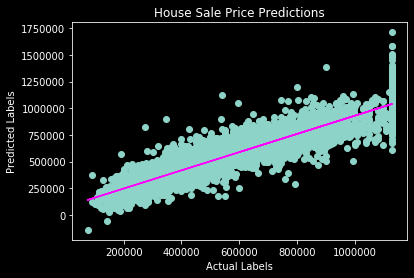

In [39]:
# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('House Sale Price Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Trying an Decision Tree Algorithm
As an alternative to a linear model, there's a category of algorithms for machine learning that uses a tree-based approach in which the features in the dataset are examined in a series of evaluations, each of which results in a branch in a decision tree based on the feature value. At the end of each series of branches are leaf-nodes with the predicted label value based on the feature values.

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_5 <= 0.79
|   |--- feature_9 <= -0.19
|   |   |--- feature_5 <= -0.11
|   |   |   |--- feature_11 <= -0.24
|   |   |   |   |--- feature_10 <= -1.16
|   |   |   |   |   |--- feature_9 <= -1.59
|   |   |   |   |   |   |--- feature_11 <= -1.01
|   |   |   |   |   |   |   |--- feature_0 <= 0.14
|   |   |   |   |   |   |   |   |--- value: [128000.00]
|   |   |   |   |   |   |   |--- feature_0 >  0.14
|   |   |   |   |   |   |   |   |--- feature_17 <= 0.54
|   |   |   |   |   |   |   |   |   |--- value: [220000.00]
|   |   |   |   |   |   |   |   |--- feature_17 >  0.54
|   |   |   |   |   |   |   |   |   |--- value: [257500.00]
|   |   |   |   |   |   |--- feature_11 >  -1.01
|   |   |   |   |   |   |   |--- feature_3 <= -0.45
|   |   |   |   |   |   |   |   |--- feature_1 <= 0.34
|   |   |   |   |   |   |   |   |   |--- feature_1 <= -0.64
|   |   |   |   |   |   |   |   |   |   |--- value: [215000.00]
|   |   |   |   |   |   |   |   |   |--- feature_1

So now we have a tree-based model; but is it any good? Let's evaluate it with the test data.

R2 = 0.7870941465518376


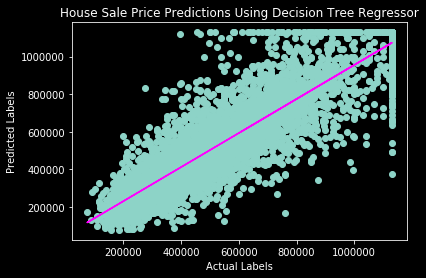

In [42]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
from sklearn.metrics import r2_score
tree_score = model.score(X_test,y_test)
print(f'R2 = {tree_score}')

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('House Sale Price Predictions Using Decision Tree Regressor')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

* Hence, with default parameter values it's not working well.